# Example of basic Mixture of Gaussians 

In [30]:
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mixture_of_gaussians import MixtureOfGaussians

In [65]:
a = np.random.multivariate_normal([5, 5], [[0.5, 0],[0, 10]], 100)
b = np.random.multivariate_normal([5, 5], [[10, 0],[0, 0.5]], 100)
c = np.random.multivariate_normal([10, 10], [[0.5,0.1],[0.5, 2]], 10)
d = np.concatenate((a, b, c), axis=0)
data = pd.DataFrame(d, columns=['x', 'y'])
data['g'] = np.concatenate((np.zeros(100), np.ones(100), np.full(10, 2)), axis=0)

<ipython-input-65-71eb075bc292>:3: RuntimeWarning: covariance is not positive-semidefinite.
  c = np.random.multivariate_normal([10, 10], [[0.5,0.1],[0.5, 2]], 10)


In [66]:
def plot_rings(mu, cov, ax):
    
    x, y = np.mgrid[0:12:0.1, 0:12:0.1]
    pos = np.dstack((x, y))
    rv = st.multivariate_normal(mu, cov)
    ax.contour(x, y, rv.pdf(pos), levels=3)

In [67]:
means = KMeans(3).fit(c).cluster_centers_

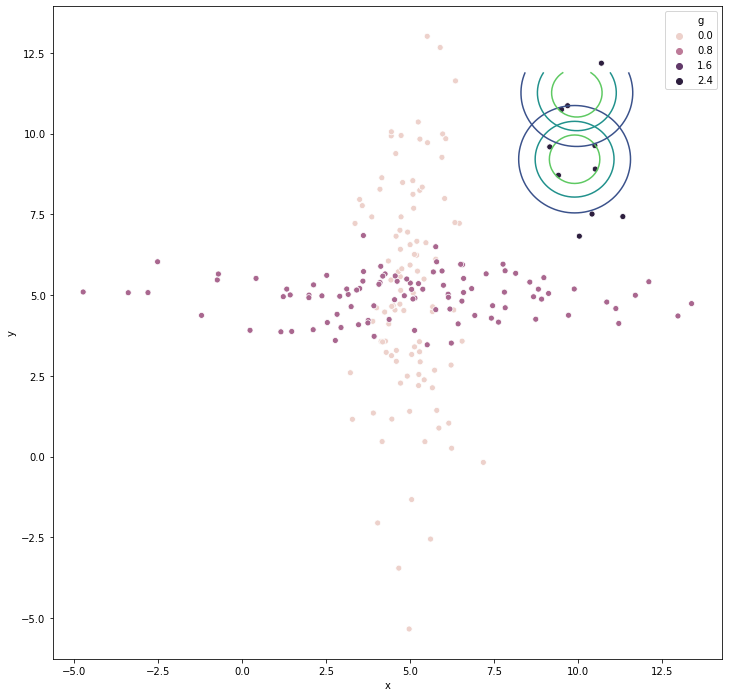

In [68]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot('x', 'y', hue='g',data=data, ax=ax)
plot_rings(means[0], [[1, 0],[0,1]], ax)
plot_rings(means[1], [[1, 0],[0,1]], ax)

In [69]:
model = MixtureOfGaussians(max_iter=10000).fit(c, 2)

In [70]:
cluster, log_like = model.result()

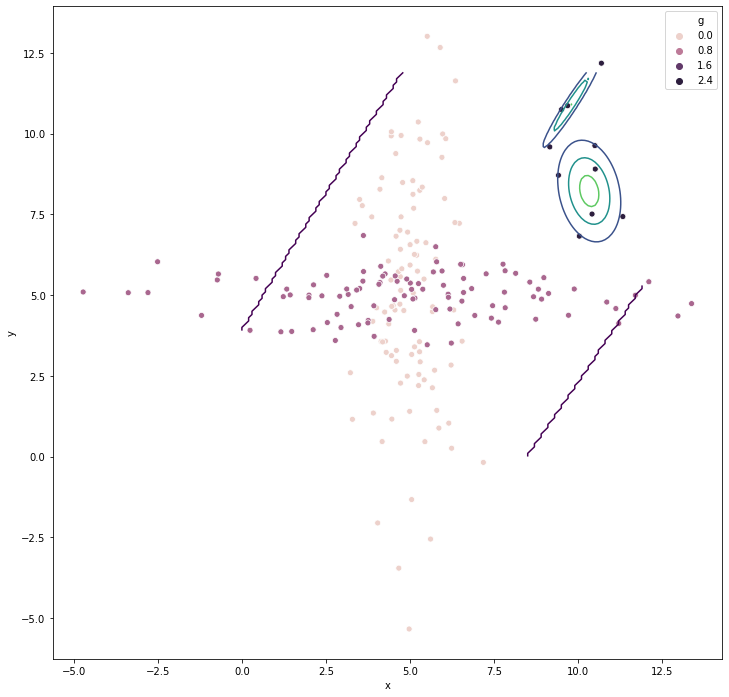

In [71]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot('x', 'y', hue='g',data=data, ax=ax)
plot_rings(cluster[0]['mu_k'], cluster[0]['cov_k'], ax)
plot_rings(cluster[1]['mu_k'], cluster[1]['cov_k'], ax)

In [53]:
cluster

[{'pi_k': 0.719415394966051,
  'mu_k': array([10.10840906, 10.23368069]),
  'cov_k': array([[3.31875368, 0.53958354],
         [0.53958354, 1.92302761]]),
  'gamma_k': array([0.99994637, 0.39878465, 0.99792994, 1.        , 0.99999986,
         0.33629067, 1.        , 1.        , 0.39689517, 0.19504935,
         0.2714854 , 0.32641757, 0.99999995, 0.47831868, 0.99999494,
         0.3045018 , 0.29638182, 0.37972612, 0.53359916, 1.        ,
         1.        , 0.99637094, 0.99999876, 0.99999722, 0.99999999,
         0.35164288, 1.        , 0.28367947, 0.87758905, 1.        ,
         0.27327362, 0.39529009, 0.32486136, 0.99999486, 0.63996542,
         0.64996863, 1.        , 1.        , 1.        , 1.        ,
         1.        , 0.56726144, 0.58726925, 0.15704959, 0.99999993,
         0.35356752, 0.29943867, 1.        , 0.99914179, 1.        ,
         0.34288619, 0.99999989, 1.        , 0.43877615, 1.        ,
         0.25100991, 0.32288328, 0.75733716, 1.        , 0.40863074,
      

In [45]:
print(len(log_like))

10001
